In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [5]:
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0

In [6]:
df.shape

(1025, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
df.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

# Data Preprocessing

# Handling Duplicates and Outliers

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: >

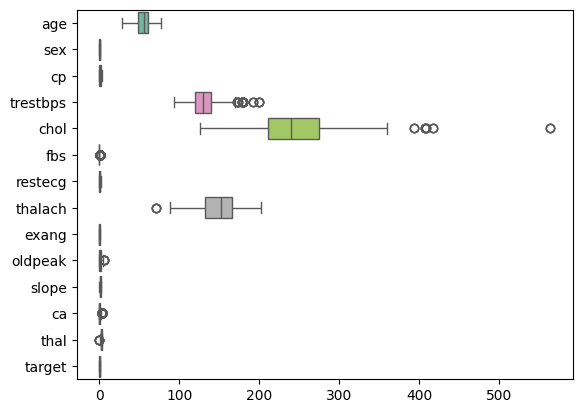

In [10]:
sns.boxplot(data=df,orient="h",palette="Set2")

<Axes: xlabel='age'>

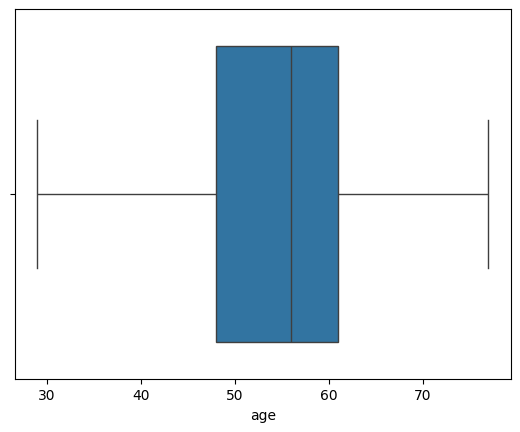

In [11]:
sns.boxplot(data=df,x=df["age"])


<Axes: xlabel='trestbps'>

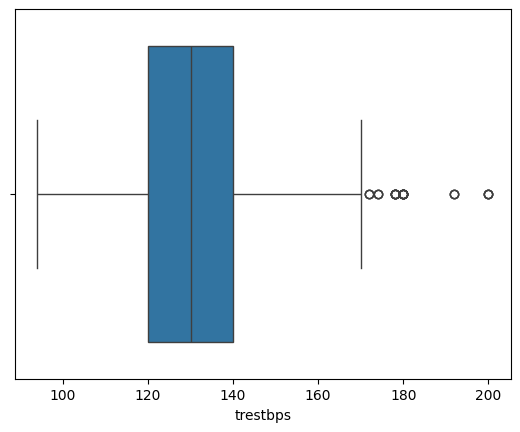

In [12]:
sns.boxplot(data=df,x=df["trestbps"])

<Axes: xlabel='chol'>

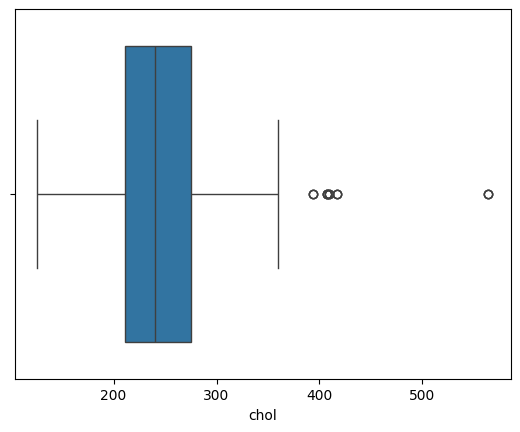

In [13]:
sns.boxplot(data=df,x=df["chol"])

<Axes: xlabel='thalach'>

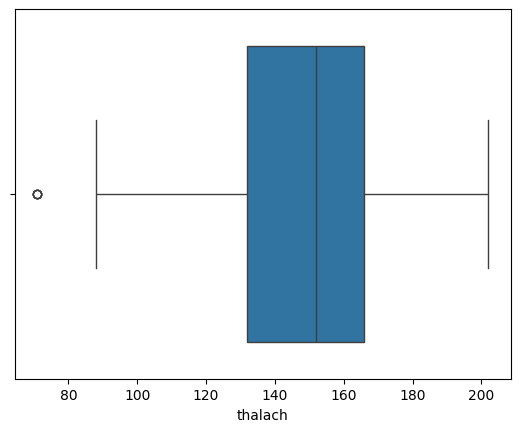

In [14]:
sns.boxplot(data=df,x=df["thalach"])

<Axes: xlabel='oldpeak'>

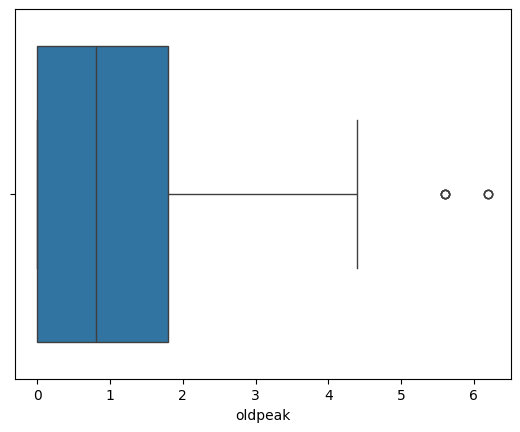

In [15]:
sns.boxplot(data=df,x=df["oldpeak"])

In [16]:
#print min and max of acceptable range
maxtrest = 140 + (1.5)*(140-120)
print("Max of accpetable range of trestbps: ",maxtrest)
mintrest = 120 - (1.5)*(140-120)
print("Min of acceptable range of trestbps: ",mintrest)
maxchol = 275 + (1.5)*(275-211)
print("Max of accpetable range of chol: ",maxchol)
minchol = 211 - (1.5)*(275-211)
print("Min of acceptable range of chol: ",minchol)
maxthal = 166 + (1.5)*(166-133)
print("Max of accpetable range of thalach: ",maxthal)
minthal = 133 - (1.5)*(166-133)
print("Min of acceptable range of thalach: ",minthal)
maxpeak = 1.6+ (1.5)*(1.6-0)
print("Max of accpetable range of oldpeak: ",maxpeak)
minpeak = 0 - (1.5)*(1.6-0)
print("Min of acceptable range of oldpeak: ",minpeak)

Max of accpetable range of trestbps:  170.0
Min of acceptable range of trestbps:  90.0
Max of accpetable range of chol:  371.0
Min of acceptable range of chol:  115.0
Max of accpetable range of thalach:  215.5
Min of acceptable range of thalach:  83.5
Max of accpetable range of oldpeak:  4.0
Min of acceptable range of oldpeak:  -2.4000000000000004


In [17]:
#since thalach isinteger attribute
minthal = 84
maxthal = 216

In [18]:
#cap outliers with min and max of acceptable range
for i in range(len(df["trestbps"])):
    if df["trestbps"][i]>maxtrest:
        df["trestbps"][i]=maxtrest
    elif df["trestbps"][i]<mintrest:
        df["trestbps"][i]=mintrest

In [19]:
for i in range(len(df["chol"])):
    if df["chol"][i]>maxchol:
        df["chol"][i]=maxchol
    elif df["chol"][i]<minchol:
        df["chol"][i]=minchol

for i in range(len(df["thalach"])):
    if df["thalach"][i]>maxthal:
        df["thalach"][i]=maxthal
    elif df["thalach"][i]<minthal:
        df["thalach"][i]=minthal

for i in range(len(df["oldpeak"])):
    if df["oldpeak"][i]>maxpeak:
        df["oldpeak"][i]=maxpeak
    elif df["oldpeak"][i]<minpeak:
        df["oldpeak"][i]=minpeak

df.describe()

age          sex           cp     trestbps         chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean     54.434146     0.695610     0.942439   131.260488   244.981463   
std       9.072290     0.460373     1.029641    16.532208    47.746162   
min      29.000000     0.000000     0.000000    94.000000   126.000000   
25%      48.000000     0.000000     0.000000   120.000000   211.000000   
50%      56.000000     1.000000     1.000000   130.000000   240.000000   
75%      61.000000     1.000000     2.000000   140.000000   275.000000   
max      77.000000     1.000000     3.000000   170.000000   371.000000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.164878     0.336585     1.056098   
std       0.356527     0.527878    22.847044     0.472772     1.124768   
min       0.000000     0.000000    84.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     4.000000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

<Axes: >

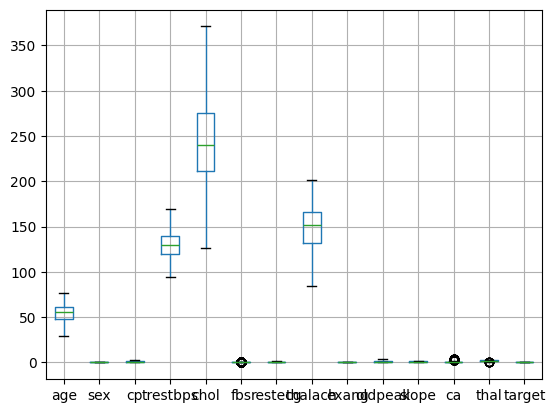

In [20]:
df.boxplot()

## Feature Selection

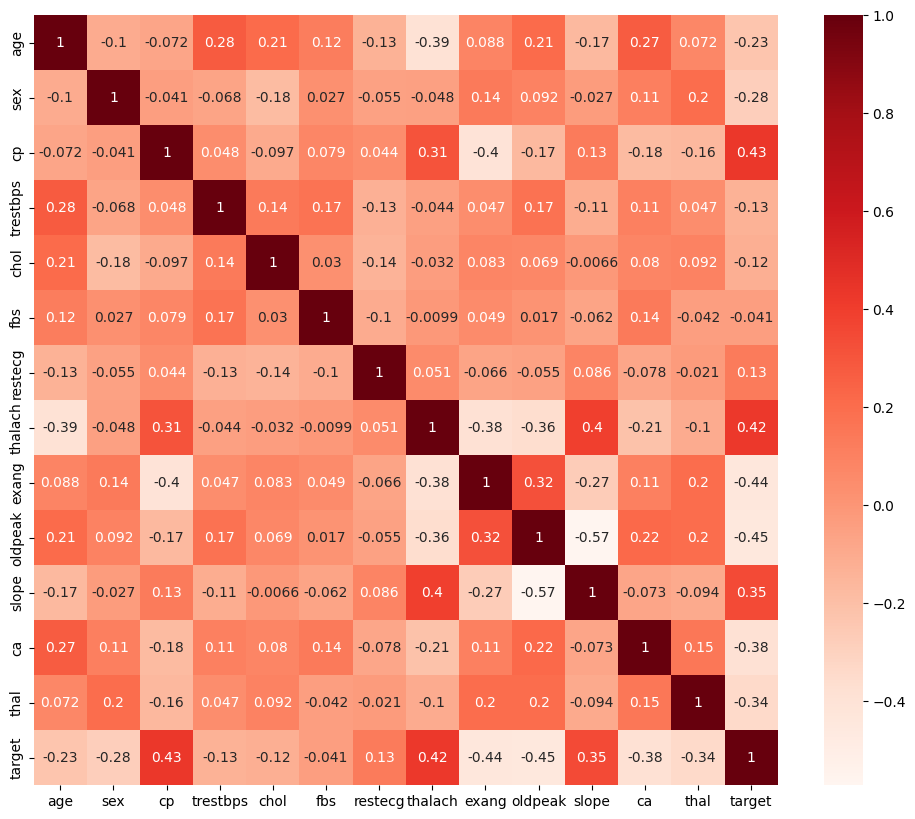

In [21]:
#correlation matrix

plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

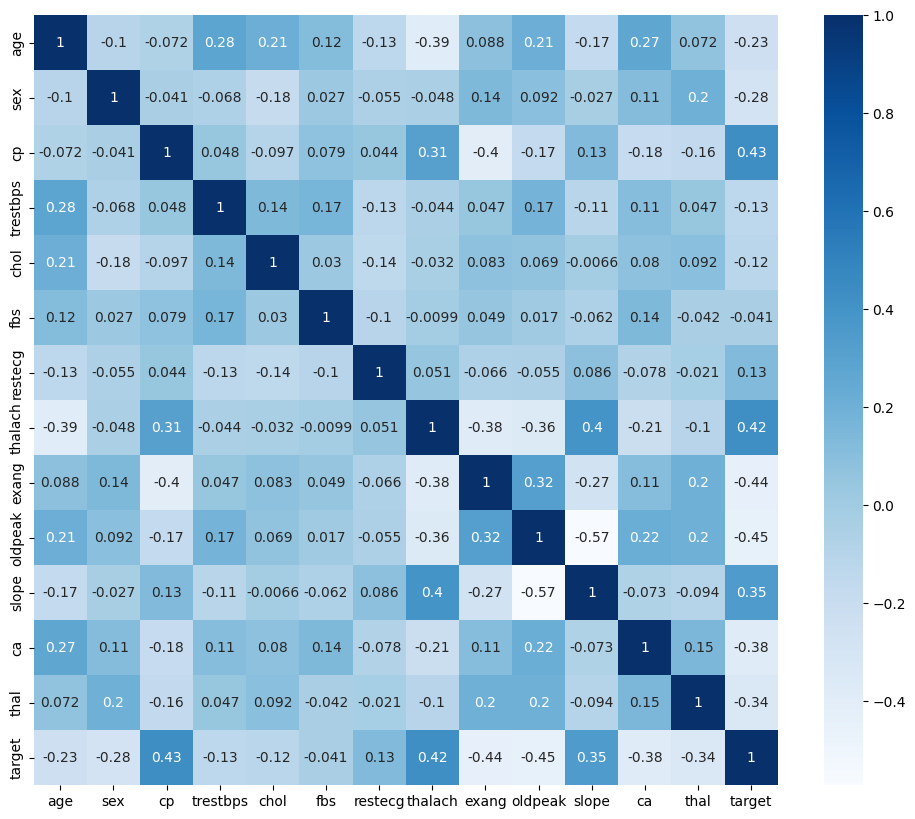

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Blues)
plt.show()

<Axes: title={'center': 'Correlation with Target'}>

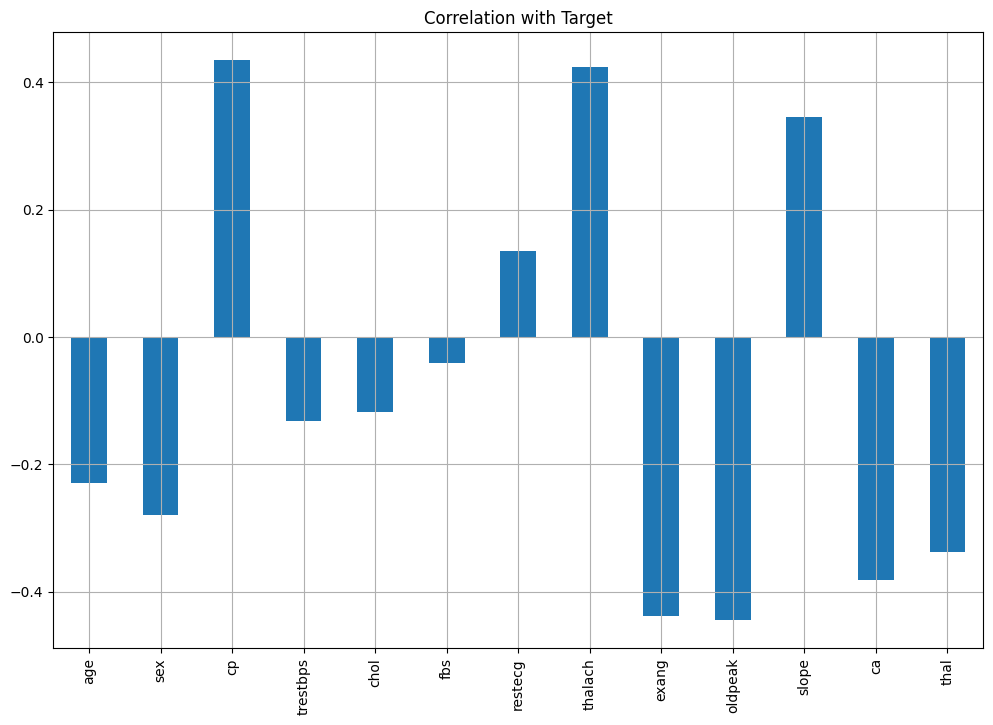

In [23]:
df.drop('target', axis=1).corrwith(df.target).plot(kind = 'bar', grid = True,
                                                             figsize = (12, 8),
                                                             title = "Correlation with Target")

Dummy variables

In [24]:
#categorical variables to convert to dummy variables
for column in df.columns:
    if len(df[column].unique()) <= 10:
        print(f"{column} : {df[column].unique()}")

sex : [1 0]
cp : [0 1 2 3]
fbs : [0 1]
restecg : [1 0 2]
exang : [0 1]
slope : [2 0 1]
ca : [2 0 1 3 4]
thal : [3 2 1 0]
target : [0 1]


In [25]:
#Convert to dummy variables
import pandas as get_dummies

a = pd.get_dummies(df['sex'], prefix="sex")
b = pd.get_dummies(df['cp'], prefix="cp")
c = pd.get_dummies(df['fbs'], prefix="fbs")
d = pd.get_dummies(df['restecg'], prefix="restecg")
e = pd.get_dummies(df['exang'], prefix="exang")
f = pd.get_dummies(df['slope'], prefix="slope")
g = pd.get_dummies(df['ca'], prefix="ca")
h = pd.get_dummies(df['thal'], prefix="thal")


In [26]:
#data frame with dummy variables
frames = [df, a, b, c, d, e, f, g, h]

In [27]:
#combine dummy variables with dataset
df2 = pd.concat(frames, axis = 1)

In [28]:
#drop categorical variabes as they are converted to dummy variables
df2 = df2.drop(columns = ['sex','cp', 'fbs', 'restecg',
                                  'exang','slope','ca','thal'])

df2.head()

age  trestbps  chol  thalach  oldpeak  target  sex_0  sex_1  cp_0   cp_1  \
0   52       125   212      168      1.0       0  False   True  True  False   
1   53       140   203      155      3.1       0  False   True  True  False   
2   70       145   174      125      2.6       0  False   True  True  False   
3   61       148   203      161      0.0       0  False   True  True  False   
4   62       138   294      106      1.9       0   True  False  True  False   

   ...  slope_2   ca_0   ca_1   ca_2   ca_3   ca_4  thal_0  thal_1  thal_2  \
0  ...     True  False  False   True  False  False   False   False   False   
1  ...    False   True  False  False  False  False   False   False   False   
2  ...    False   True  False  False  False  False   False   False   False   
3  ...     True  False   True  False  False  False   False   False   False   
4  ...    False  False  False  False   True  False   False   False    True   

   thal_3  
0    True  
1    True  
2    True  
3    True  
4   False  

[5 rows x 31 columns]

# Exploratory Data Analysis(EDA)

Dimension and variables or attributes of dataset




In [29]:
type(df)

pandas.core.frame.DataFrame

In [30]:
df.shape

(1025, 14)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1025 non-null   int64  
 1   trestbps   1025 non-null   int64  
 2   chol       1025 non-null   int64  
 3   thalach    1025 non-null   int64  
 4   oldpeak    1025 non-null   float64
 5   target     1025 non-null   int64  
 6   sex_0      1025 non-null   bool   
 7   sex_1      1025 non-null   bool   
 8   cp_0       1025 non-null   bool   
 9   cp_1       1025 non-null   bool   
 10  cp_2       1025 non-null   bool   
 11  cp_3       1025 non-null   bool   
 12  fbs_0      1025 non-null   bool   
 13  fbs_1      1025 non-null   bool   
 14  restecg_0  1025 non-null   bool   
 15  restecg_1  1025 non-null   bool   
 16  restecg_2  1025 non-null   bool   
 17  exang_0    1025 non-null   bool   
 18  exang_1    1025 non-null   bool   
 19  slope_0    1025 non-null   bool   
 20  slope_1 

Frequency Distribution Table

In [33]:
pd.crosstab(index=df['sex'],columns='count')

col_0  count
sex         
0        312
1        713

In [34]:
pd.crosstab(index=df['cp'],columns='count')

col_0  count
cp          
0        497
1        167
2        284
3         77

In [35]:
pd.crosstab(index=df['fbs'],columns='count')

col_0  count
fbs         
0        872
1        153

In [36]:
pd.crosstab(index=df['restecg'],columns='count')

col_0    count
restecg       
0          497
1          513
2           15

In [37]:
pd.crosstab(index=df['exang'],columns='count')

col_0  count
exang       
0        680
1        345

In [38]:
pd.crosstab(index=df['slope'],columns='count')

col_0  count
slope       
0         74
1        482
2        469

In [39]:
pd.crosstab(index=df['ca'],columns='count')

col_0  count
ca          
0        578
1        226
2        134
3         69
4         18

In [40]:
pd.crosstab(index=df['thal'],columns='count')

col_0  count
thal        
0          7
1         64
2        544
3        410

In [41]:
pd.crosstab(index=df['target'],columns='count')

col_0   count
target       
0         499
1         526

In [42]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

1 : Defective Heart


0 : Healty Heart

In [43]:
X = df.drop(columns='target',axis=1)

In [44]:
X

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2         0   0     3  
3         2   1     3  
4         1   3     2  
...     ...  ..   ...  
1020      2   0     2  
1021      1   1     3  
1022      1   1     2  
1023      2   0     2  
1024      1   1     3  

[1025 rows x 13 columns]

In [45]:
Y = df['target']

In [46]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

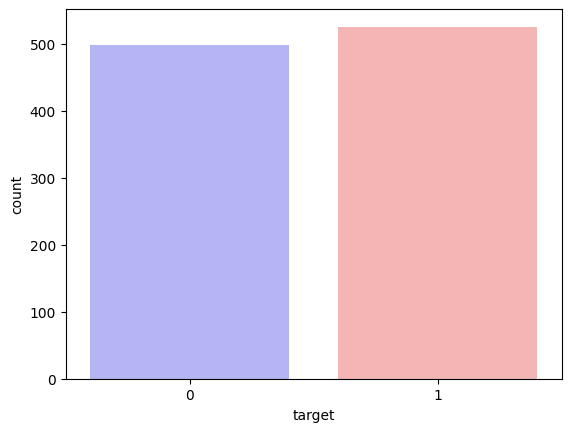

In [47]:
sns.countplot(x='target',data=df, palette='bwr')
plt.show()

Measure of Central Tendency and Dispersion¶


In [48]:
df.describe()

age          sex           cp     trestbps         chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean     54.434146     0.695610     0.942439   131.260488   244.981463   
std       9.072290     0.460373     1.029641    16.532208    47.746162   
min      29.000000     0.000000     0.000000    94.000000   126.000000   
25%      48.000000     0.000000     0.000000   120.000000   211.000000   
50%      56.000000     1.000000     1.000000   130.000000   240.000000   
75%      61.000000     1.000000     2.000000   140.000000   275.000000   
max      77.000000     1.000000     3.000000   170.000000   371.000000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.164878     0.336585     1.056098   
std       0.356527     0.527878    22.847044     0.472772     1.124768   
min       0.000000     0.000000    84.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     4.000000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [49]:
df.mode()

age  sex   cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  58.0  1.0  0.0     120.0   204  0.0      1.0    162.0    0.0      0.0   
1   NaN  NaN  NaN       NaN   234  NaN      NaN      NaN    NaN      NaN   

   slope   ca  thal  target  
0    1.0  0.0   2.0     1.0  
1    NaN  NaN   NaN     NaN

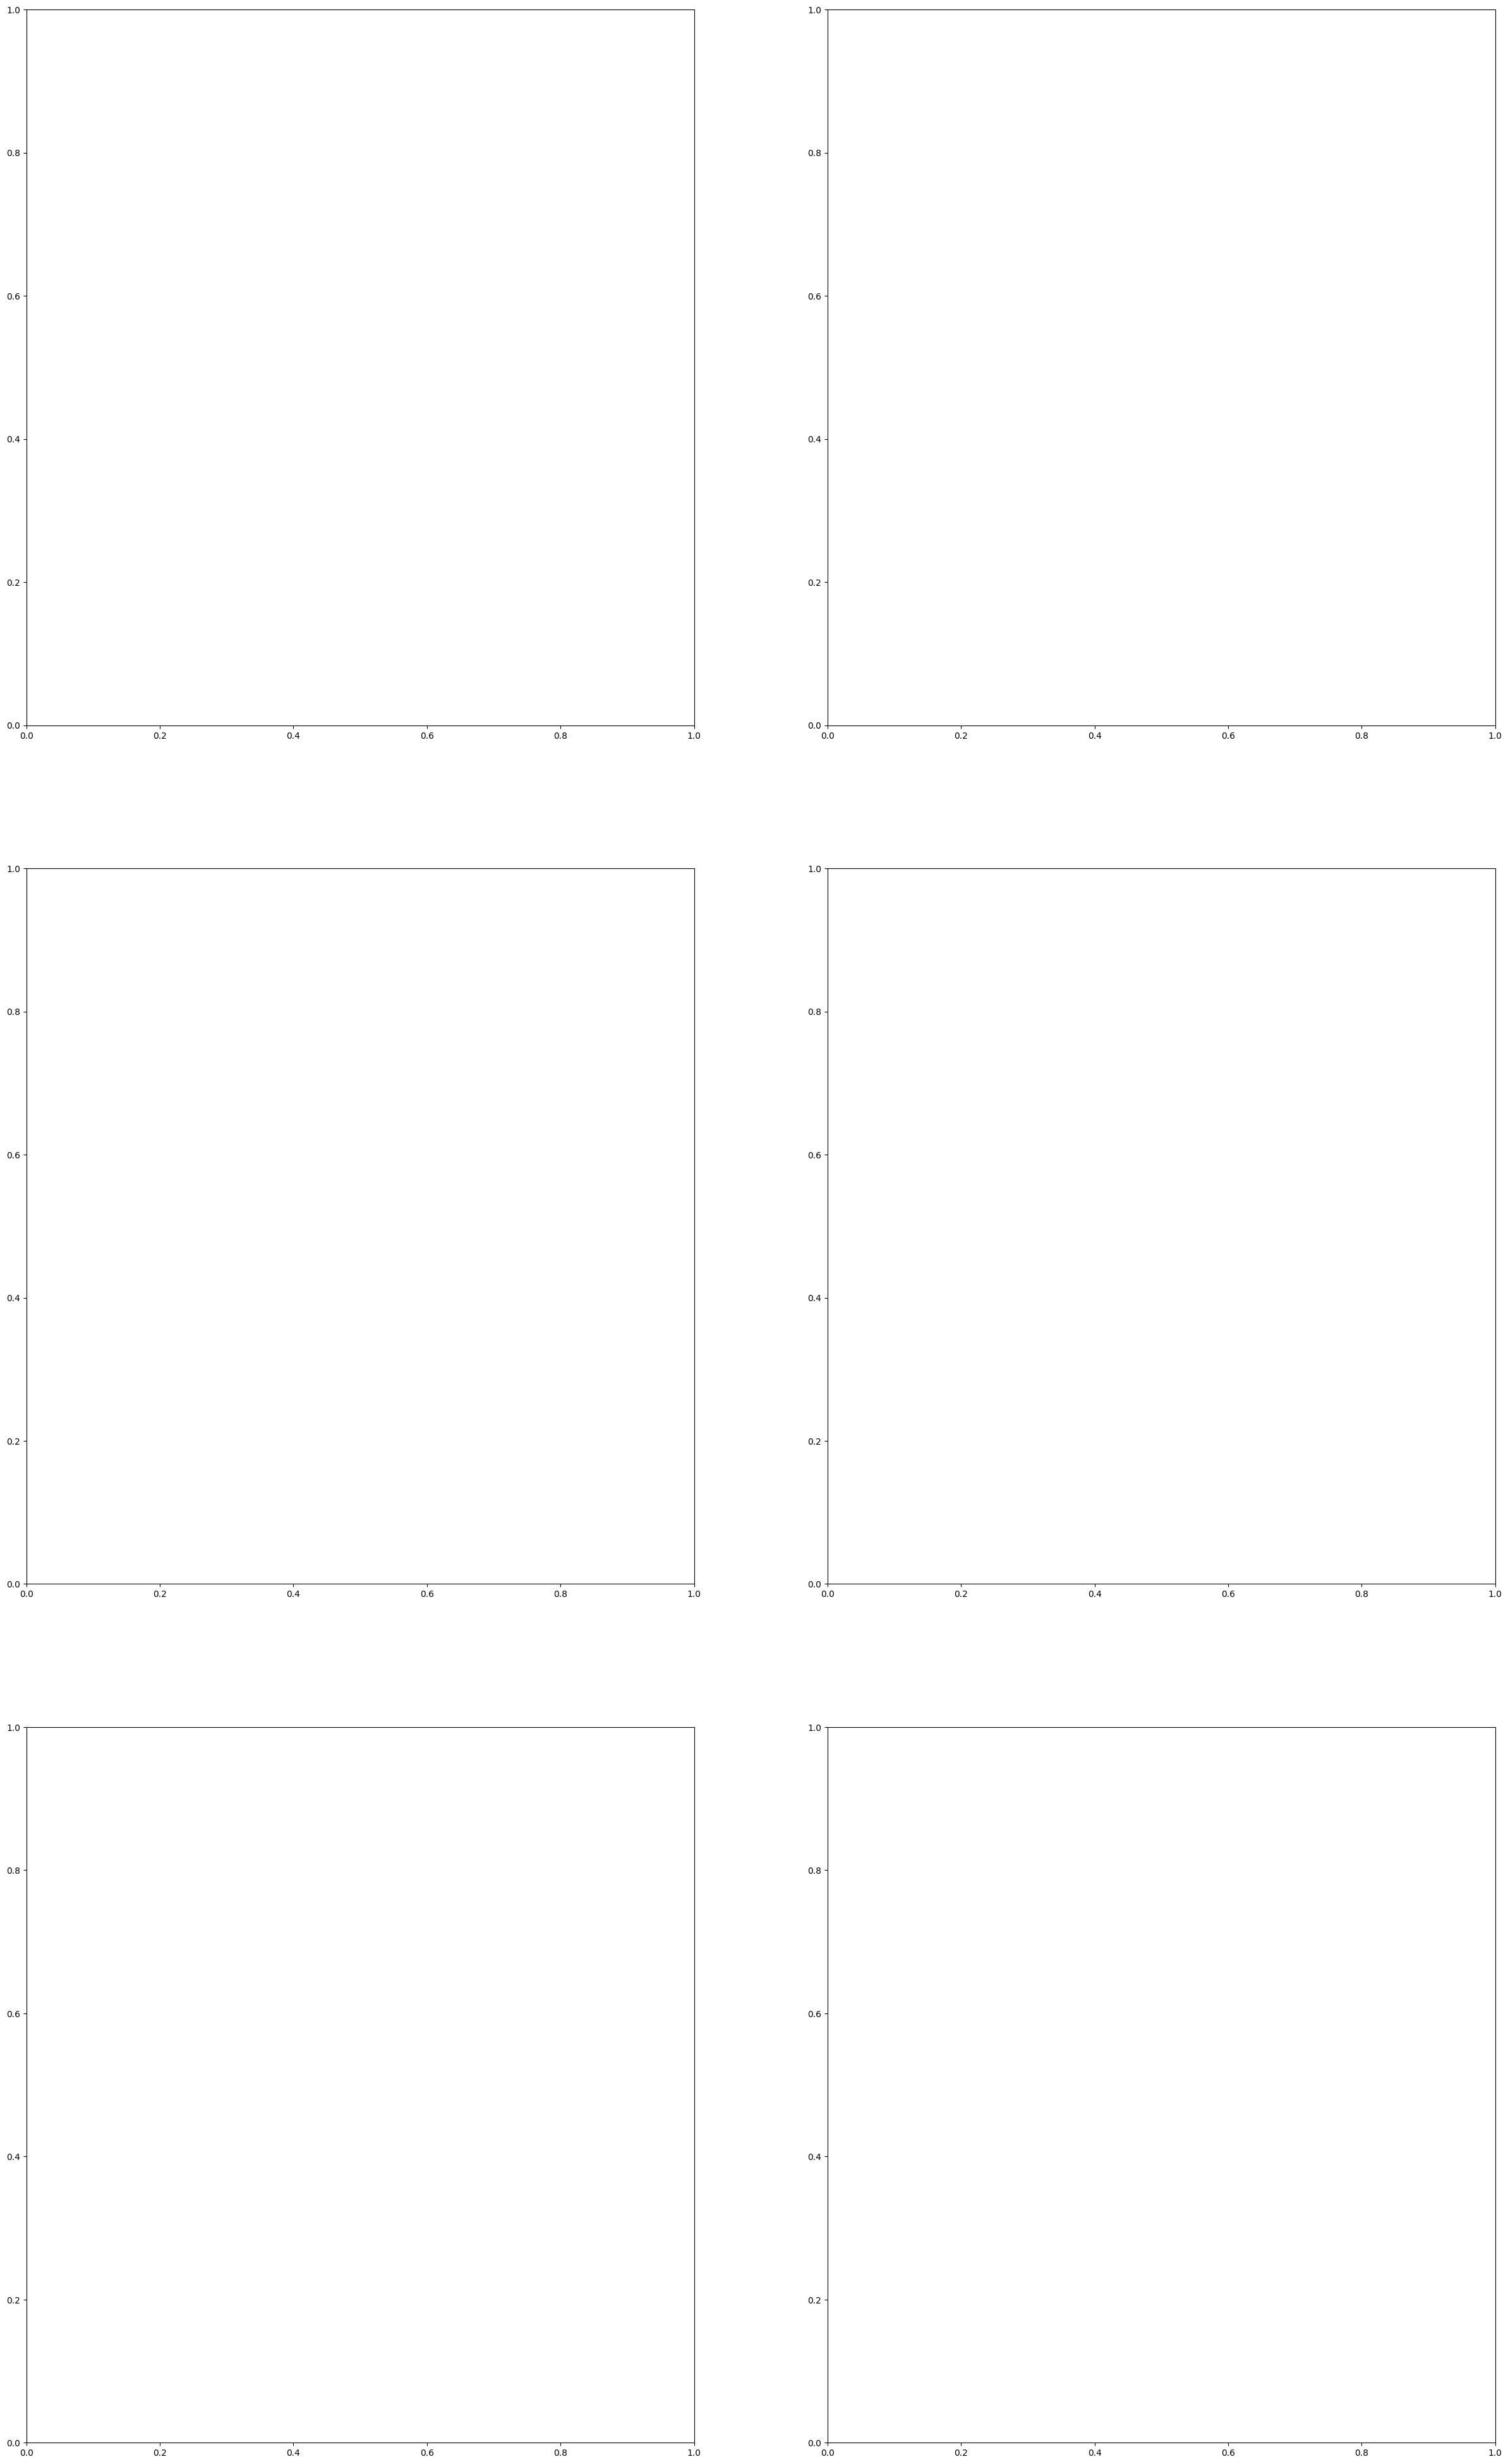

In [50]:
fig, axes = plt.subplots(3,2, figsize=(30,50))

Text(0, 0.5, 'Target')

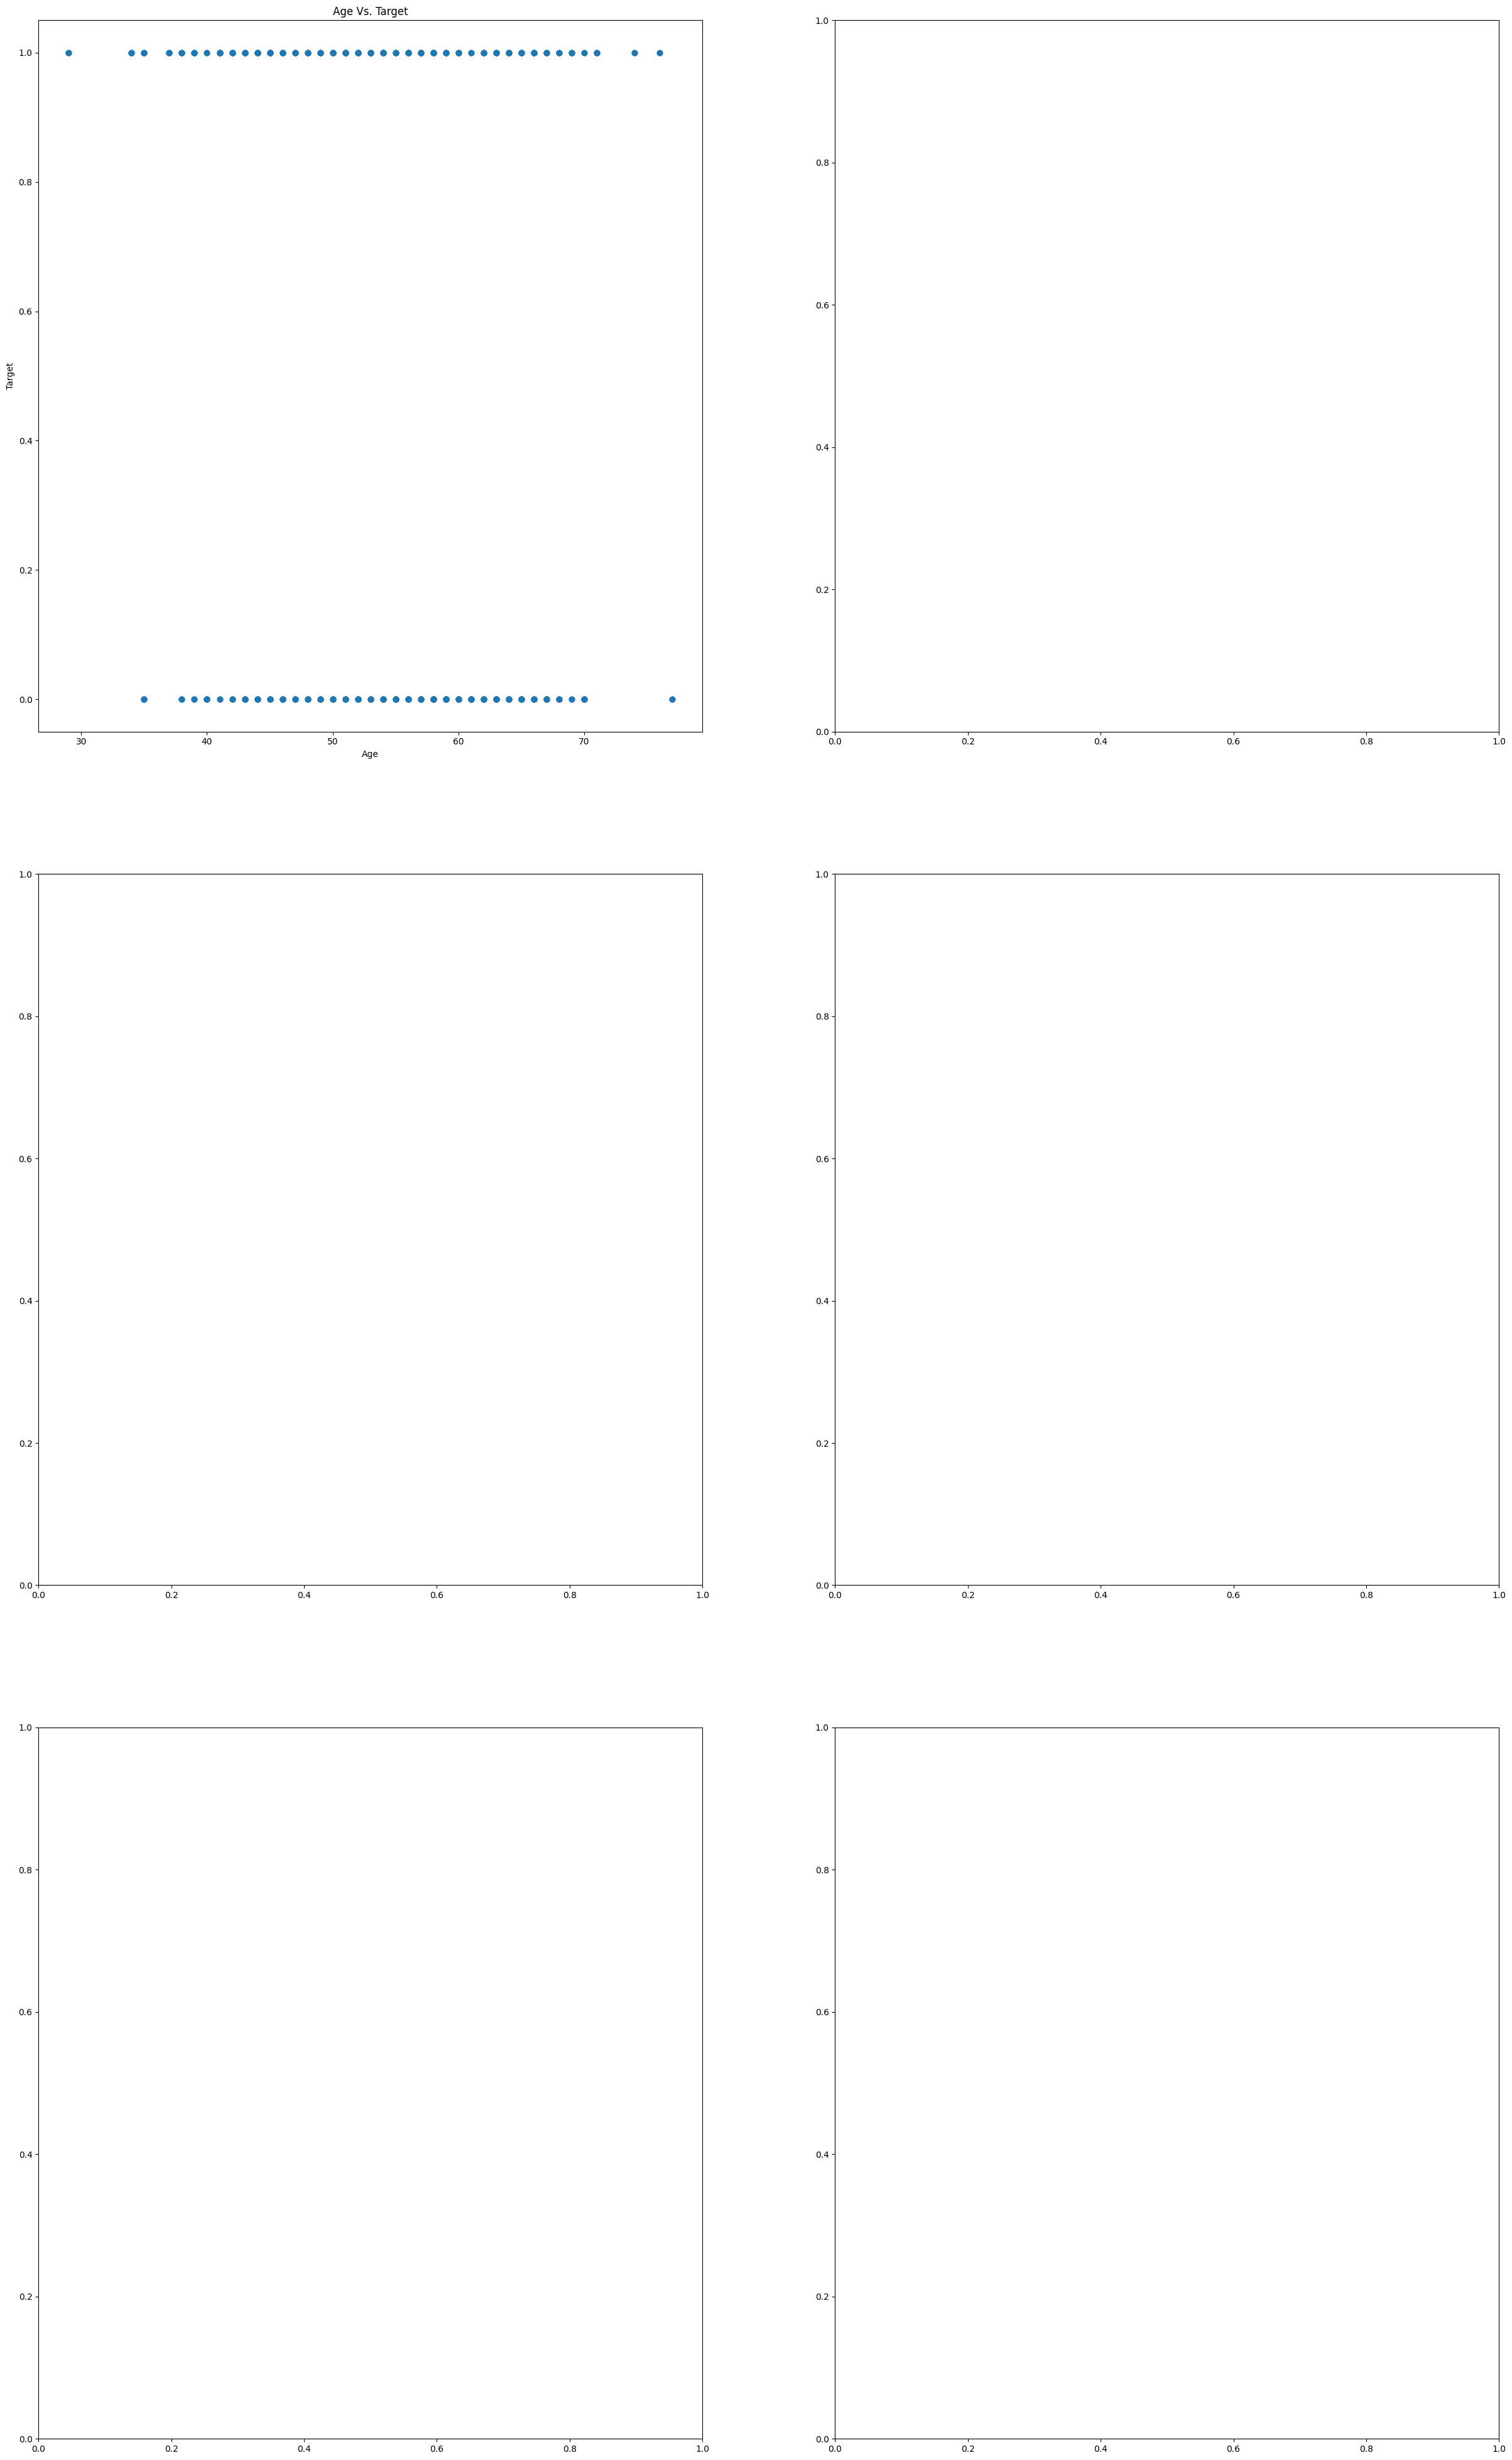

In [51]:
fig, axes = plt.subplots(3, 2, figsize=(30,50))

#scatter plot of radius and compactness
axes[0,0].scatter(df['age'], df['target'])
axes[0,0].set_title("Age Vs. Target")
axes[0,0].set_xlabel("Age")
axes[0,0].set_ylabel("Target")

Text(0, 0.5, 'Target')

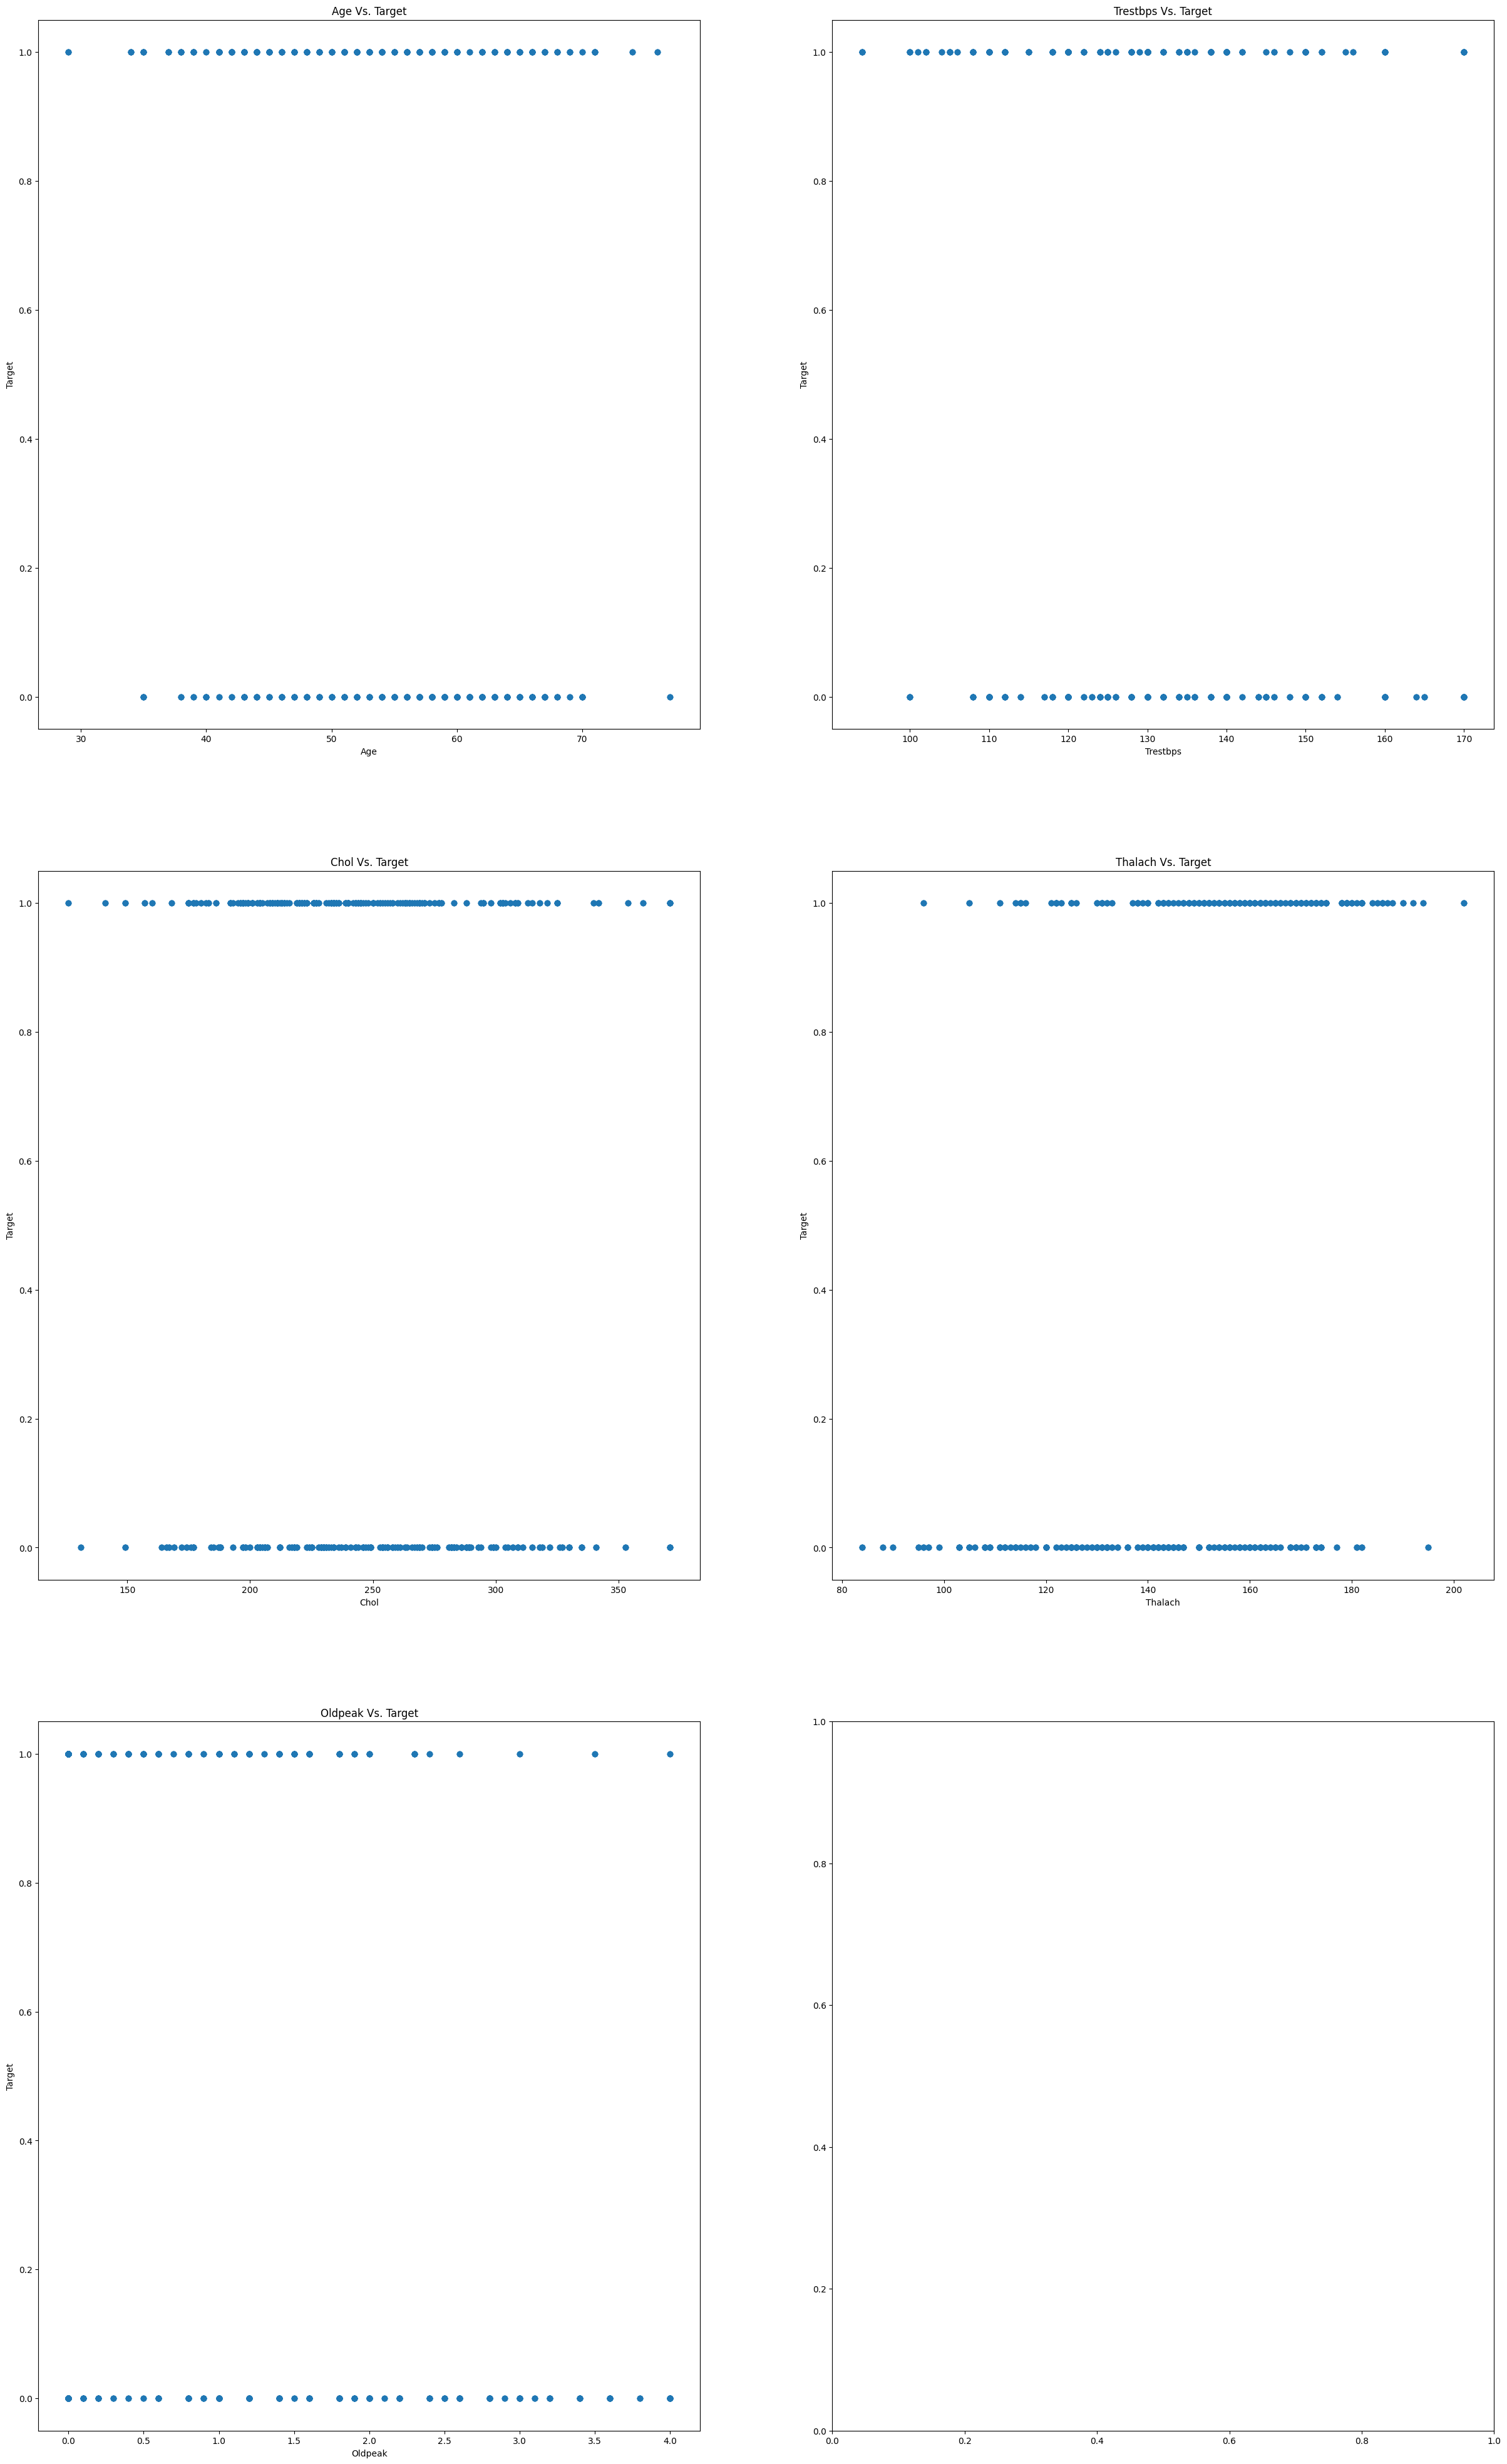

In [52]:
fig, axes = plt.subplots(3, 2, figsize=(30,50))

#scatter plot of radius and compactness
axes[0,0].scatter(df['age'], df['target'])
axes[0,0].set_title("Age Vs. Target")
axes[0,0].set_xlabel("Age")
axes[0,0].set_ylabel("Target")

#scatter plot of radius and texture
axes[0,1].scatter(df['trestbps'], df['target'])
axes[0,1].set_title("Trestbps Vs. Target")
axes[0,1].set_xlabel("Trestbps")
axes[0,1].set_ylabel("Target")

#scatter plot of radius and smoothness
axes[1,0].scatter(df['chol'], df['target'])
axes[1,0].set_title("Chol Vs. Target")
axes[1,0].set_xlabel("Chol")
axes[1,0].set_ylabel("Target")

#scatter plot of radius and concavity
axes[1,1].scatter(df['thalach'], df['target']);
axes[1,1].set_title("Thalach Vs. Target");
axes[1,1].set_xlabel("Thalach")
axes[1,1].set_ylabel("Target")

axes[2,0].scatter(df['oldpeak'], df['target']);
axes[2,0].set_title("Oldpeak Vs. Target");
axes[2,0].set_xlabel("Oldpeak")
axes[2,0].set_ylabel("Target")

(0.0, 4.0)

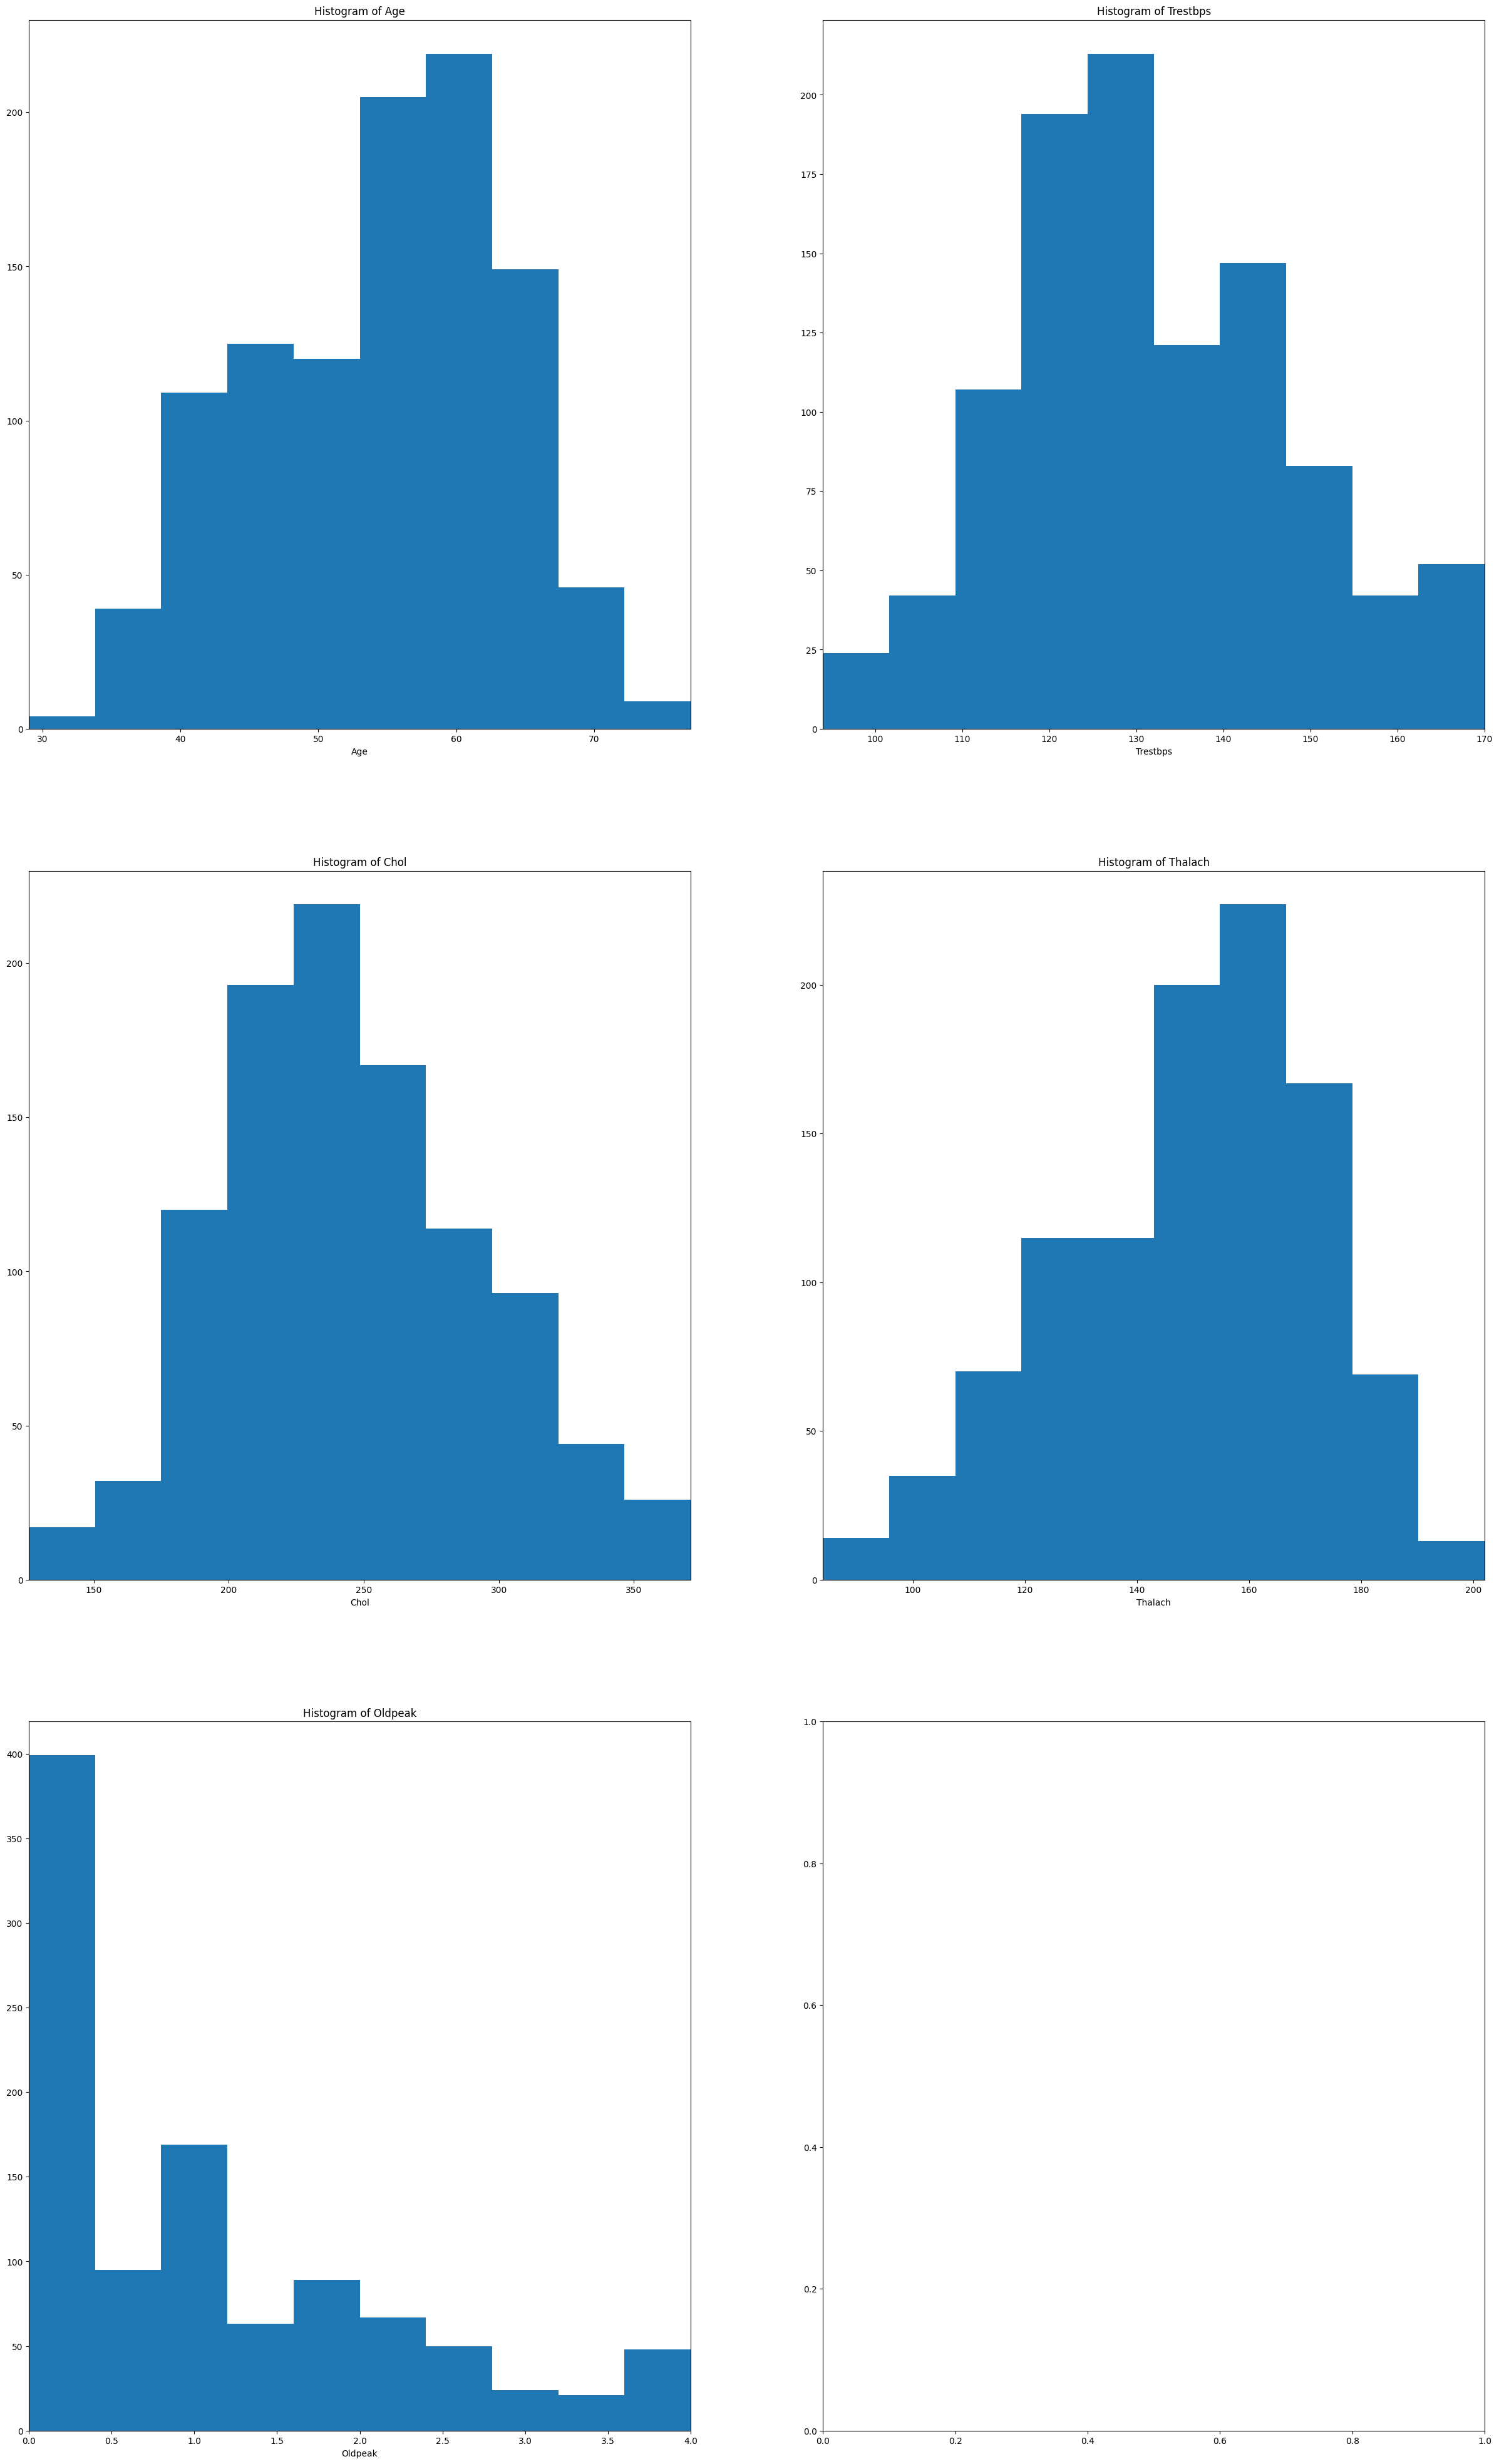

In [53]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(30, 50))

# Histogram of age
axes[0, 0].hist(df['age'])
axes[0, 0].set_title("Histogram of Age")
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_xlim((min(df.age), max(df.age)))

# Histogram of trestbps
axes[0, 1].hist(df['trestbps'])
axes[0, 1].set_title("Histogram of Trestbps")
axes[0, 1].set_xlabel("Trestbps")
axes[0, 1].set_xlim((min(df.trestbps), max(df.trestbps)))

# Histogram of chol
axes[1, 0].hist(df['chol'])
axes[1, 0].set_title("Histogram of Chol")
axes[1, 0].set_xlabel("Chol")
axes[1, 0].set_xlim((min(df.chol), max(df.chol)))

# Histogram of thalach
axes[1, 1].hist(df['thalach'])
axes[1, 1].set_title("Histogram of Thalach")
axes[1, 1].set_xlabel("Thalach")
axes[1, 1].set_xlim((min(df.thalach), max(df.thalach)))

# Histogram of oldpeak
axes[2, 0].hist(df['oldpeak'])
axes[2, 0].set_title("Histogram of Oldpeak")
axes[2, 0].set_xlabel("Oldpeak")
axes[2, 0].set_xlim((min(df.oldpeak), max(df.oldpeak)))



In [54]:
cv = df.std()/df.mean()
cv

age         0.166665
sex         0.661827
cp          1.092528
trestbps    0.125950
chol        0.194897
fbs         2.388496
restecg     0.996454
thalach     0.153166
exang       1.404614
oldpeak     1.065022
slope       0.445915
ca          1.366840
thal        0.267077
target      0.974472
dtype: float64

Skewness of Dataset

In [55]:
df.skew()

age        -0.248866
sex        -0.851449
cp          0.529455
trestbps    0.402284
chol        0.343813
fbs         1.971339
restecg     0.180440
thalach    -0.465409
exang       0.692655
oldpeak     0.954009
slope      -0.479134
ca          1.261189
thal       -0.524390
target     -0.052778
dtype: float64

Correlation Matrix

In [56]:
df.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103240 -0.071966  0.278179  0.213481  0.121243   
sex      -0.103240  1.000000 -0.041119 -0.067713 -0.181965  0.027200   
cp       -0.071966 -0.041119  1.000000  0.047868 -0.097159  0.079294   
trestbps  0.278179 -0.067713  0.047868  1.000000  0.135275  0.170346   
chol      0.213481 -0.181965 -0.097159  0.135275  1.000000  0.030109   
fbs       0.121243  0.027200  0.079294  0.170346  0.030109  1.000000   
restecg  -0.132696 -0.055117  0.043581 -0.127729 -0.137856 -0.104051   
thalach  -0.389859 -0.048239  0.306936 -0.044431 -0.031885 -0.009858   
exang     0.088163  0.139157 -0.401513  0.046996  0.083081  0.049261   
oldpeak   0.211706  0.091850 -0.171507  0.172785  0.068811  0.017088   
slope    -0.169105 -0.026666  0.131633 -0.110336 -0.006644 -0.061902   
ca        0.271551  0.111729 -0.176206  0.105135  0.080030  0.137156   
thal      0.072297  0.198424 -0.163341  0.047446  0.091881 -0.042177   
target   -0.229324 -0.279501  0.434854 -0.132301 -0.118254 -0.041164   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.132696 -0.389859  0.088163  0.211706 -0.169105  0.271551   
sex      -0.055117 -0.048239  0.139157  0.091850 -0.026666  0.111729   
cp        0.043581  0.306936 -0.401513 -0.171507  0.131633 -0.176206   
trestbps -0.127729 -0.044431  0.046996  0.172785 -0.110336  0.105135   
chol     -0.137856 -0.031885  0.083081  0.068811 -0.006644  0.080030   
fbs      -0.104051 -0.009858  0.049261  0.017088 -0.061902  0.137156   
restecg   1.000000  0.050727 -0.065606 -0.055364  0.086086 -0.078072   
thalach   0.050727  1.000000 -0.384504 -0.356516  0.396667 -0.210958   
exang    -0.065606 -0.384504  1.000000  0.321652 -0.267335  0.107849   
oldpeak  -0.055364 -0.356516  0.321652  1.000000 -0.570983  0.219533   
slope     0.086086  0.396667 -0.267335 -0.570983  1.000000 -0.073440   
ca       -0.078072 -0.210958  0.107849  0.219533 -0.073440  1.000000   
thal     -0.020504 -0.099909  0.197201  0.201266 -0.094090  0.149014   
target    0.134468  0.423552 -0.438029 -0.445007  0.345512 -0.382085   

              thal    target  
age       0.072297 -0.229324  
sex       0.198424 -0.279501  
cp       -0.163341  0.434854  
trestbps  0.047446 -0.132301  
chol      0.091881 -0.118254  
fbs      -0.042177 -0.041164  
restecg  -0.020504  0.134468  
thalach  -0.099909  0.423552  
exang     0.197201 -0.438029  
oldpeak   0.201266 -0.445007  
slope    -0.094090  0.345512  
ca        0.149014 -0.382085  
thal      1.000000 -0.337838  
target   -0.337838  1.000000

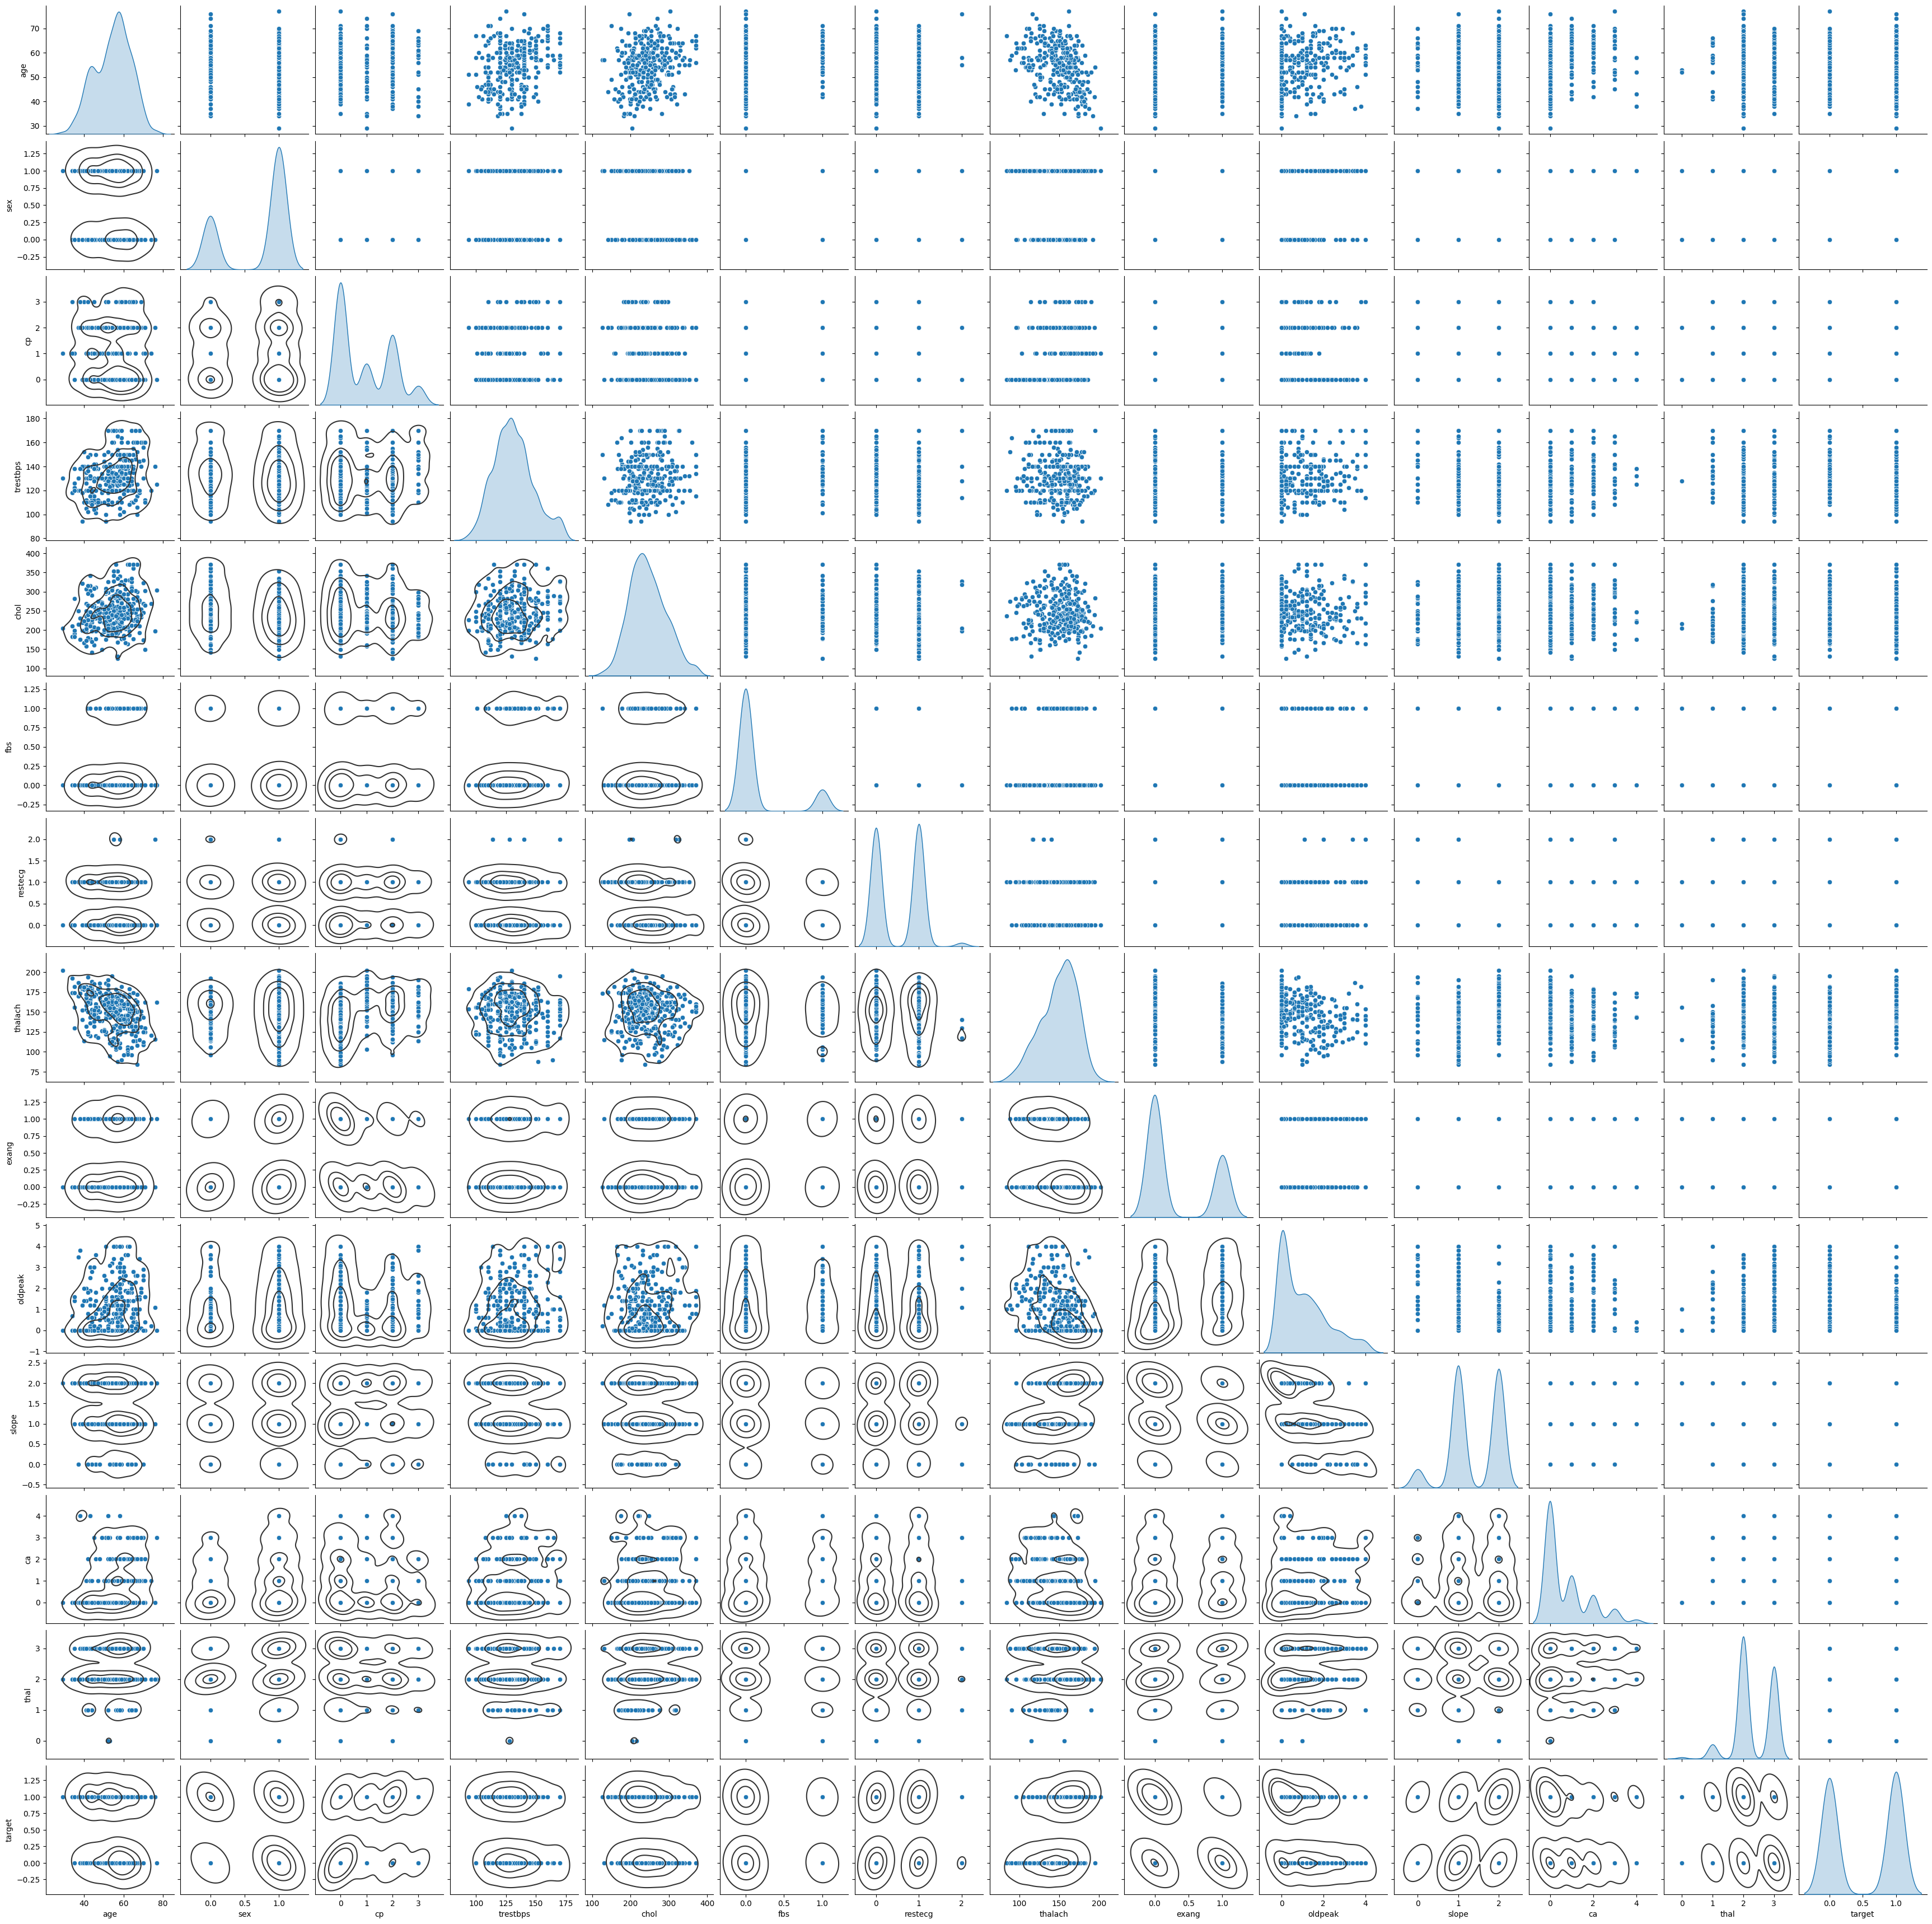

In [57]:
g = sns.pairplot(df, diag_kind='kde')
g.map_lower(sns.kdeplot, levels=4, color=".2")

# Visualization of Attributes

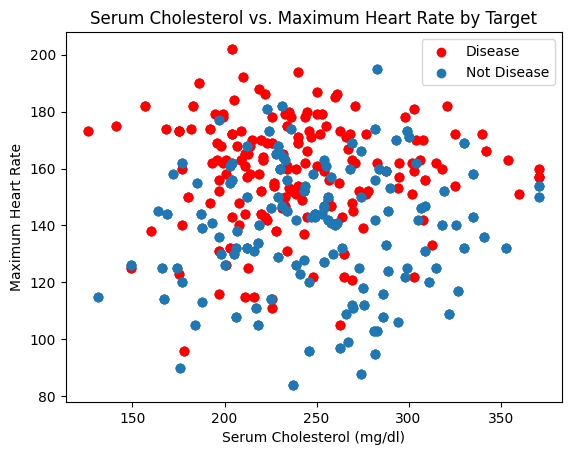

In [58]:
# Scatter plot for chol vs. thalach based on target

plt.scatter(x=df.chol[df.target == 1], y=df.thalach[df.target == 1], c="red")
plt.scatter(x=df.chol[df.target == 0], y=df.thalach[df.target == 0])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Serum Cholesterol (mg/dl)")
plt.ylabel("Maximum Heart Rate")
plt.title("Serum Cholesterol vs. Maximum Heart Rate by Target")
plt.show()


**Spilitting dataset into train and test**

In [59]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=24)

In [60]:
print(X.shape,X_train.shape,X_test.shape)

(1025, 13) (820, 13) (205, 13)


# Model Training

In [61]:
model = LogisticRegression()

In [62]:
#Train the model with Training data
model.fit(X_train,Y_train)

LogisticRegression()

In [63]:
Y_pred = model.predict(X_test)

In [64]:
Y_train

431    0
382    0
756    0
940    0
574    0
      ..
496    0
327    0
140    0
163    0
823    1
Name: target, Length: 820, dtype: int64

In [65]:
Y_pred

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1])

In [66]:
score = accuracy_score(Y_test,Y_pred)

In [67]:
print("The accuracy score is ", score)

The accuracy score is  0.824390243902439


# Building a predictive system

In [68]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

#Change the input data into array

arr = np.array(input_data)

In [69]:
print(arr)

[ 62.    0.    0.  140.  268.    0.    0.  160.    0.    3.6   0.    2.
   2. ]


In [70]:
Prediction = model.predict(arr.reshape(1,-1))

In [71]:
print(Prediction)

[0]


In [72]:
if Prediction[0] == 0:
    print("The person does not have heart disease")
else:
    print("The person has heart disease")

The person does not have heart disease


# Saving the model

In [75]:
from joblib import dump, load

# Save model
dump(model, 'models/model.joblib')

# Load model
loaded_model = load('models/model.joblib')
